### Codio Activity 16.3: Fitting Models with Kernel Functions

**Expected Time = 60 minutes**

**Total Points = 35**

This assignment focuses on using kernel functions like those shown in the lectures and comparing the resulting decision boundaries.  You will again use the wine data, first by applying a polynomial kernel function to the data and then fitting a `LogisticRegression` estimator on the transformed data.  Using a similar approach to the last assignment, you will visualize the decision boundaries that result from the kernel functions.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns

In [15]:
from sklearn.metrics import accuracy_score


The wine data is loaded, subset to `total_phenols` and `color_intensity`, and split into train/test sets below.  

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X[['total_phenols', 'color_intensity']].values, y, random_state = 42)

[Back to top](#-Index)

### Problem 1

#### Logistic Regression with Linear Kernel

**10 Points**

Below, you are provided two functions -- `Kernel_matrix` and `evaluate_kernel_model` -- that are taken from the lectures.  Use these functions together with the function `linear_kernel` to determine the following variables:

```
- linear_kernel_matrix: Create Kernel Matrix using linear_kernel_function and X_train
- linear_logistic: Fit a LogisticRegression model (using max_iter=1000) on the Kernel Matrix and y_train
- linear_predictions: Evaluate the model using evaluate_kernel_model and X_train, X_test
```



In [4]:
def Kernel_matrix(kfunc, X):
    N, _ = X.shape
    K = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kfunc(X[i, :], X[j, :])
    return K

In [5]:
def evaluate_kernel_model(model, kfunc, X_train, X_test):
    N1, _ = X_train.shape
    N2, _ = X_test.shape
    
    K = np.empty((N2, N1))
    for i in range(N2):
        for j in range(N1):
            K[i, j] = kfunc(X_train[j, :], X_test[i, :])
    return model.predict(K)

In [6]:
def linear_kernel_function(x, z):
    return np.dot(x, z)

In [16]:
### GRADED
linear_kernel_matrix = ''
linear_logistic = ''
linear_predictions = ''

# YOUR CODE HERE
linear_kernel_matrix = Kernel_matrix(linear_kernel_function, X_train)

linear_logistic = LogisticRegression(max_iter=1000).fit(linear_kernel_matrix, y_train)

linear_predictions = evaluate_kernel_model(linear_logistic, linear_kernel_function, X_train, X_test)

### ANSWER CHECK
print(linear_predictions[:10])
print(accuracy_score(y_test, linear_predictions))

[0 0 2 0 0 0 1 2 1 2]
0.8444444444444444


(2.0, 10.0)

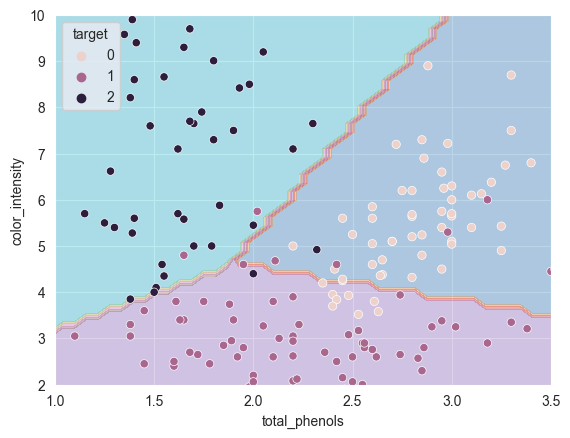

In [8]:
## Uncomment to Visualize
xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50)
yy = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)

grid = np.c_[XX.ravel(), YY.ravel()]
labels = evaluate_kernel_model(linear_logistic, linear_kernel_function, X_train, grid)

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)

[Back to top](#-Index)

### Problem 2

#### Logistic Regression with Quadratic Kernel

**10 Points**

Now, complete the `quadratic_kernel_function` below to implement a polynomial kernel of degree 2 on the input data similar to that of the `linear_kernel_function`.  Then, use the quadratic kernel to generate a `quadratic_kernel_matrix` object, and fit a logistic model as `quadratic_logistic` below -- to avoid a convergence warning set `max_iter = 1000`.  Make predictions as `quadratic_predictions` and uncomment the code to visualize the resulting decision boundary. 

In [17]:
### GRADED
def quadratic_kernel_function(x, z):
    '''
    This function applies a quadratic kernel to 
    array x and z.
    '''
    pass

quadratic_kernel_matrix = ''
quadratic_logistic = ''
quadratic_predictions = ''

# YOUR CODE HERE
def quadratic_kernel_function(x, z):
    return (np.dot(x, z) + 1) ** 2

quadratic_kernel_matrix = Kernel_matrix(quadratic_kernel_function, X_train)

quadratic_logistic = LogisticRegression(max_iter=1000).fit(quadratic_kernel_matrix, y_train)

quadratic_predictions = evaluate_kernel_model(quadratic_logistic, quadratic_kernel_function, X_train, X_test)

### ANSWER CHECK
print(quadratic_predictions[:10])
print(accuracy_score(y_test, quadratic_predictions))

[0 0 2 0 0 0 1 2 1 2]
0.8222222222222222


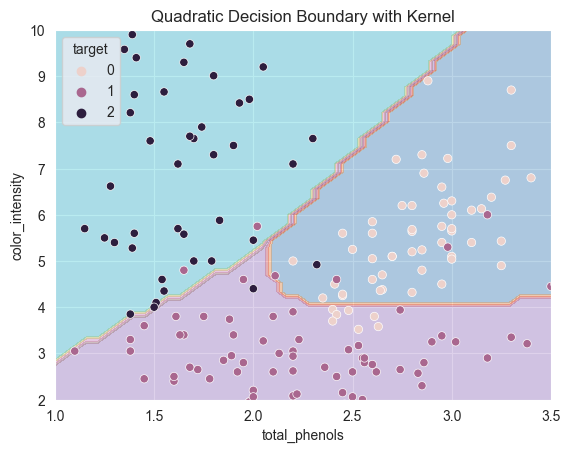

In [10]:
labels = evaluate_kernel_model(quadratic_logistic, quadratic_kernel_function, X_train, grid)

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.title('Quadratic Decision Boundary with Kernel');

[Back to top](#-Index)

### Problem 3

#### Logistic Regression with Quintic Kernel

**10 Points**

Finally, complete the function `quintic_kernel_function` below that creates a polynomial kernel of degree 5.  Use this to create the `quintic_kernel_matrix`, `quintic_logistic`, and `quintic_predictions`.  

**NOTE**: To avoid convergence warnings here, set the `max_iter = 10_000` in your `quintic_logistic` estimator.

Uncomment the code to visualize the new decision boundary.

In [18]:
### GRADED
def quintic_kernel_function(x, z):
    '''
    This function applies a quintic (5th degree
    polynomial) kernel to 
    array x and z.
    '''
    pass

quintic_kernel_matrix = ''
quintic_logistic = ''
quintic_predictions = ''

# YOUR CODE HERE
def quintic_kernel_function(x, z):
    return (np.dot(x, z) + 1) ** 5

quintic_kernel_matrix = Kernel_matrix(quintic_kernel_function, X_train)

quintic_logistic = LogisticRegression(max_iter=10000).fit(quintic_kernel_matrix, y_train)

quintic_predictions = evaluate_kernel_model(quintic_logistic, quintic_kernel_function, X_train, X_test)

### ANSWER CHECK
print(quintic_predictions[:10])
print(accuracy_score(y_test, quintic_predictions))

[0 0 2 0 1 0 1 2 1 2]
0.8222222222222222


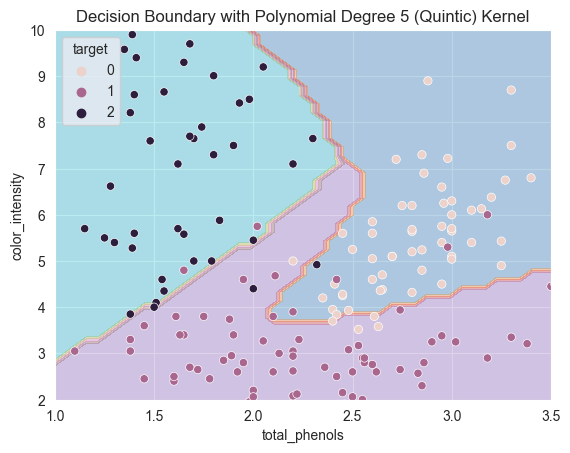

In [12]:
labels = evaluate_kernel_model(quintic_logistic, quintic_kernel_function, X_train, grid)
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.title('Decision Boundary with Polynomial Degree 5 (Quintic) Kernel');

[Back to top](#-Index)

### Problem 4

#### Evaluate the Models

**5 Points**

Of the three models, which performed the best on the test data in terms of overall accuracy?  Assign your answer as a string to `best_acc` below -- `linear`, `quadratic`, or `quintic`.

In [14]:
### GRADED
best_acc = ''

# YOUR CODE HERE
best_acc = 'linear'

### ANSWER CHECK
print(best_acc)

linear


In [14]:
accuracy_score()